In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # or 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

### 삼림 데이터, 행정구역 경계 데이터 읽어오기

In [3]:
data = gpd.read_file("./merged100_converted.gpkg")

In [10]:
bdd = gpd.read_file(f"./ctprvn/ctprvn.shp", encoding="euc-kr")
bdd.set_crs(epsg=5179, inplace=True)
bdd = bdd.to_crs(data.crs)

#### 침엽수림, 혼효림, 활엽수림 분포 지도에 plot & 행정구역 경계 plot

<Axes: >

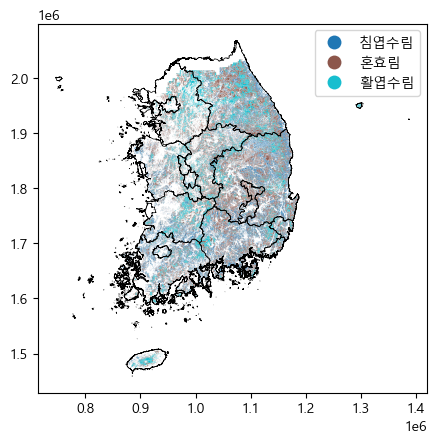

In [7]:
ax = data.plot(column="frtp_CD", categorical=True, legend=True)
bdd.boundary.plot(ax = ax, color = "black", linewidth = 0.5)

#### 각 도, 광역시 별 삼림 임상 비율 계산

In [11]:
joined = gpd.sjoin(data, bdd, how="inner", predicate="within")

In [12]:
joined.head()

,index,FIFTH_FRTP,DMCLS_CD,AGCLS_CD,DNST_CD,frtp_CD,geometry,index_right,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM
1,1,H,2,4,B,활엽수림,"MULTIPOLYGON (((948400.28 1943550.352, 948436....",0,11,Seoul,서울특별시
2,2,H,2,4,B,활엽수림,"MULTIPOLYGON (((948917.086 1943877.663, 949068...",0,11,Seoul,서울특별시
3,3,H,2,5,B,활엽수림,"MULTIPOLYGON (((947921.377 1939678.505, 948085...",0,11,Seoul,서울특별시
4,4,H,2,5,B,활엽수림,"MULTIPOLYGON (((948903.335 1939687.335, 949128...",0,11,Seoul,서울특별시
6,6,H,2,5,C,활엽수림,"MULTIPOLYGON (((949407.417 1940586.398, 949175...",0,11,Seoul,서울특별시


In [ ]:
counts = joined.groupby(["CTP_KOR_NM", "frtp_CD"]).size().unstack(fill_value=0)
counts["총합"] = counts.sum(axis=1)
counts["활엽수림 비율"] = round(counts["활엽수림"] / counts["총합"] *100, 1)
counts["혼효림 비율"] = round(counts["혼효림"] / counts["총합"] *100, 1)
counts["침엽수림 비율"] = round(counts["침엽수림"] / counts["총합"] *100, 1)

counts

frtp_CD,침엽수림,혼효림,활엽수림,총합,활엽수림 비율,혼효림 비율,침엽수림 비율
CTP_KOR_NM,,,,,,,
강원특별자치도,14986,11679,8004,34669,23.1,33.7,43.2
경기도,987,9181,6942,17110,40.6,53.7,5.8
경상남도,12257,11539,3774,27570,13.7,41.9,44.5
경상북도,24581,23791,9475,57847,16.4,41.1,42.5
광주광역시,1017,379,223,1619,13.8,23.4,62.8
대구광역시,1112,1818,558,3488,16.0,52.1,31.9
대전광역시,235,548,515,1298,39.7,42.2,18.1
부산광역시,838,602,205,1645,12.5,36.6,50.9
서울특별시,20,194,287,501,57.3,38.7,4.0


In [24]:
counts_sorted = counts.sort_values(by="침엽수림", ascending=False)
counts_sorted

frtp_CD,침엽수림,혼효림,활엽수림,총합,활엽수림 비율,혼효림 비율,침엽수림 비율
CTP_KOR_NM,,,,,,,
경상북도,24581,23791,9475,57847,16.4,41.1,42.5
전라남도,17872,9441,3851,31164,12.4,30.3,57.3
강원특별자치도,14986,11679,8004,34669,23.1,33.7,43.2
경상남도,12257,11539,3774,27570,13.7,41.9,44.5
전라북도,11103,7743,5299,24145,21.9,32.1,46.0
충청남도,6590,9813,4912,21315,23.0,46.0,30.9
충청북도,5157,11152,7138,23447,30.4,47.6,22.0
제주특별자치도,1408,906,1027,3341,30.7,27.1,42.1
울산광역시,1338,1232,641,3211,20.0,38.4,41.7
